# Import Data and Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/penjualan_konser.csv')
df

,Order_ID,Artist,City,Venue,Date,Ticket_Category,Ticket_Price,Buyer_Name,Quantity,Total_Price
0,ORD00048527,Pamungkas,Semarang,Ciwalk,2025/05/20,Festival,127493.0,"Luthfi Kusmawati, S.Farm",3.0,382479.0
1,ORD00593395,Tiara Andini,Semarang,Ciwalk,2024-12-09,Silver,NaN,Jasmin Aryani,3.0,521007.0
2,ORD00632619,Kunto Aji,Denpasar,NaN,2024-06-05,Festival,127493.0,R. Adikara Usada,4.0,509972.0
3,ORD00802637,efek rumah kaca,Balikpapan,lapangan gasibu,04-06-2025,Festival,127493.0,"T. Oskar Puspasari, S.E.",5.0,637465.0
4,ORD00071085,Dewa 19,Medan,Trans Studio Bandung,2024-04-02,Gold,217869.0,Hesti Mangunsong,4.0,871476.0
...,...,...,...,...,...,...,...,...,...,...
1570,ORD00442432,RAISA,Balikpapan,TENNIS INDOOR SENAYAN,07-30-2023,NaN,253466.0,"R. Intan Hariyah, S.Kom",3.0,760398.0
1571,ORD00389602,pamungkas,Semarang,trans studio bandung,12-22-2024,Gold,500000000.0,Koko Maulana,2.0,435738.0
1572,ORD00370921,kunto aji,Semarang,gedung kesenian jakarta,2025-03-27,Silver,173669.0,Joko Salahudin,3.0,521007.0
1573,ORD00270048,Pamungkas,Bandung,Gedung Kesenian Jakarta,2025-06-07,VIP,253466.0,Gilang Permata,4.0,1013864.0


# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         1501 non-null   object 
 1   Artist           1505 non-null   object 
 2   City             1526 non-null   object 
 3   Venue            1512 non-null   object 
 4   Date             1506 non-null   object 
 5   Ticket_Category  1512 non-null   object 
 6   Ticket_Price     1516 non-null   float64
 7   Buyer_Name       1516 non-null   object 
 8   Quantity         1524 non-null   float64
 9   Total_Price      1502 non-null   float64
dtypes: float64(3), object(7)
memory usage: 123.2+ KB


In [ ]:
df.isnull().sum()

,0
Order_ID,74
Artist,70
City,49
Venue,63
Date,69
Ticket_Category,63
Ticket_Price,59
Buyer_Name,59
Quantity,51
Total_Price,73


In [ ]:
# 1. Jika Total_Price kosong -> isi dengan Quantity * Ticket_Price
df['Total_Price'] = df['Total_Price'].fillna(df['Quantity'] * df['Ticket_Price'])

# 2. Jika Quantity kosong -> isi dengan Total_Price / Ticket_Price
df['Quantity'] = df['Quantity'].fillna(df['Total_Price'] / df['Ticket_Price'])

# 3. Jika Ticket_Price kosong -> isi dengan Total_Price / Quantity
df['Ticket_Price'] = df['Ticket_Price'].fillna(df['Total_Price'] / df['Quantity'])

# Untuk kolom teks (object), bisa pakai modus (nilai terbanyak)
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    if col != 'Date':  # skip kolom Date
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Artist,0
City,0
Venue,0
Date,69
Ticket_Category,0
Ticket_Price,0
Buyer_Name,0
Quantity,0
Total_Price,0


In [ ]:
# Normalisasi venue → jadi huruf besar semua
df["venue_norm"] = df["Venue"].str.upper()

# Normalisasi artis → kapitalisasi sesuai format judul
df["artis_norm"] = df["Artist"].str.title()

In [ ]:
df

,Order_ID,Artist,City,Venue,Date,Ticket_Category,Ticket_Price,Buyer_Name,Quantity,Total_Price,venue_norm,artis_norm
0,ORD00048527,Pamungkas,Semarang,Ciwalk,2025/05/20,Festival,127493.0,"Luthfi Kusmawati, S.Farm",3.0,382479.0,CIWALK,Pamungkas
1,ORD00593395,Tiara Andini,Semarang,Ciwalk,2024-12-09,Silver,173669.0,Jasmin Aryani,3.0,521007.0,CIWALK,Tiara Andini
2,ORD00632619,Kunto Aji,Denpasar,JCC,2024-06-05,Festival,127493.0,R. Adikara Usada,4.0,509972.0,JCC,Kunto Aji
3,ORD00802637,efek rumah kaca,Balikpapan,lapangan gasibu,04-06-2025,Festival,127493.0,"T. Oskar Puspasari, S.E.",5.0,637465.0,LAPANGAN GASIBU,Efek Rumah Kaca
4,ORD00071085,Dewa 19,Medan,Trans Studio Bandung,2024-04-02,Gold,217869.0,Hesti Mangunsong,4.0,871476.0,TRANS STUDIO BANDUNG,Dewa 19
...,...,...,...,...,...,...,...,...,...,...,...,...
1570,ORD00442432,RAISA,Balikpapan,TENNIS INDOOR SENAYAN,07-30-2023,Festival,253466.0,"R. Intan Hariyah, S.Kom",3.0,760398.0,TENNIS INDOOR SENAYAN,Raisa
1571,ORD00389602,pamungkas,Semarang,trans studio bandung,12-22-2024,Gold,500000000.0,Koko Maulana,2.0,435738.0,TRANS STUDIO BANDUNG,Pamungkas
1572,ORD00370921,kunto aji,Semarang,gedung kesenian jakarta,2025-03-27,Silver,173669.0,Joko Salahudin,3.0,521007.0,GEDUNG KESENIAN JAKARTA,Kunto Aji
1573,ORD00270048,Pamungkas,Bandung,Gedung Kesenian Jakarta,2025-06-07,VIP,253466.0,Gilang Permata,4.0,1013864.0,GEDUNG KESENIAN JAKARTA,Pamungkas


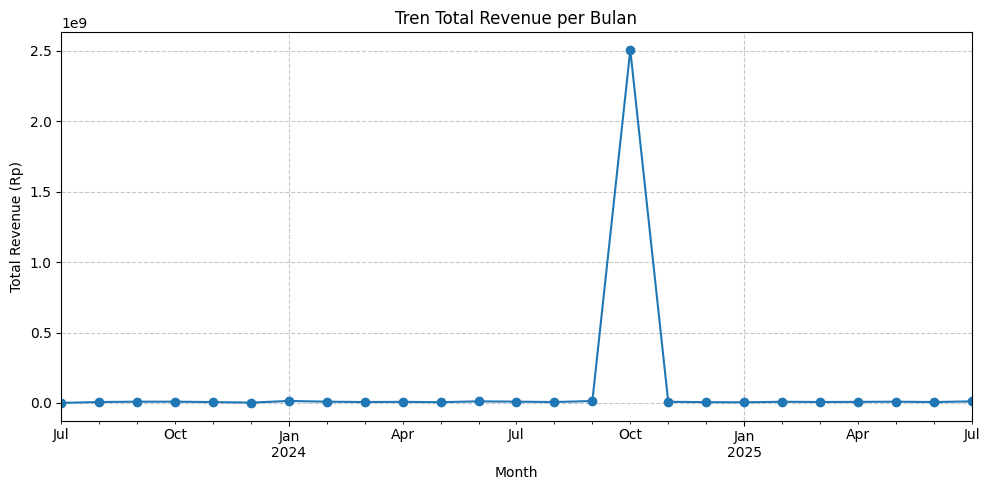

In [ ]:
# Ubah kolom Date ke format datetime (abaikan error biar NaN kalau format salah)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Tambahkan kolom bulan
df['Month'] = df['Date'].dt.to_period('M')

# Hitung revenue per bulan
monthly_revenue = df.groupby('Month')['Total_Price'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Tren Total Revenue per Bulan')
plt.ylabel('Total Revenue (Rp)')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Artist,0
City,0
Venue,0
Date,1214
Ticket_Category,0
Ticket_Price,0
Buyer_Name,0
Quantity,0
Total_Price,0


In [ ]:
df

,Order_ID,Artist,City,Venue,Date,Ticket_Category,Ticket_Price,Buyer_Name,Quantity,Total_Price,venue_norm,artis_norm,Month
0,ORD00048527,Pamungkas,Semarang,Ciwalk,2025-05-20,Festival,127493.0,"Luthfi Kusmawati, S.Farm",3.0,382479.0,CIWALK,Pamungkas,2025-05
1,ORD00593395,Tiara Andini,Semarang,Ciwalk,NaT,Silver,173669.0,Jasmin Aryani,3.0,521007.0,CIWALK,Tiara Andini,NaT
2,ORD00632619,Kunto Aji,Denpasar,JCC,NaT,Festival,127493.0,R. Adikara Usada,4.0,509972.0,JCC,Kunto Aji,NaT
3,ORD00802637,efek rumah kaca,Balikpapan,lapangan gasibu,NaT,Festival,127493.0,"T. Oskar Puspasari, S.E.",5.0,637465.0,LAPANGAN GASIBU,Efek Rumah Kaca,NaT
4,ORD00071085,Dewa 19,Medan,Trans Studio Bandung,NaT,Gold,217869.0,Hesti Mangunsong,4.0,871476.0,TRANS STUDIO BANDUNG,Dewa 19,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,ORD00442432,RAISA,Balikpapan,TENNIS INDOOR SENAYAN,NaT,Festival,253466.0,"R. Intan Hariyah, S.Kom",3.0,760398.0,TENNIS INDOOR SENAYAN,Raisa,NaT
1571,ORD00389602,pamungkas,Semarang,trans studio bandung,NaT,Gold,500000000.0,Koko Maulana,2.0,435738.0,TRANS STUDIO BANDUNG,Pamungkas,NaT
1572,ORD00370921,kunto aji,Semarang,gedung kesenian jakarta,NaT,Silver,173669.0,Joko Salahudin,3.0,521007.0,GEDUNG KESENIAN JAKARTA,Kunto Aji,NaT
1573,ORD00270048,Pamungkas,Bandung,Gedung Kesenian Jakarta,NaT,VIP,253466.0,Gilang Permata,4.0,1013864.0,GEDUNG KESENIAN JAKARTA,Pamungkas,NaT


# Data Visualization

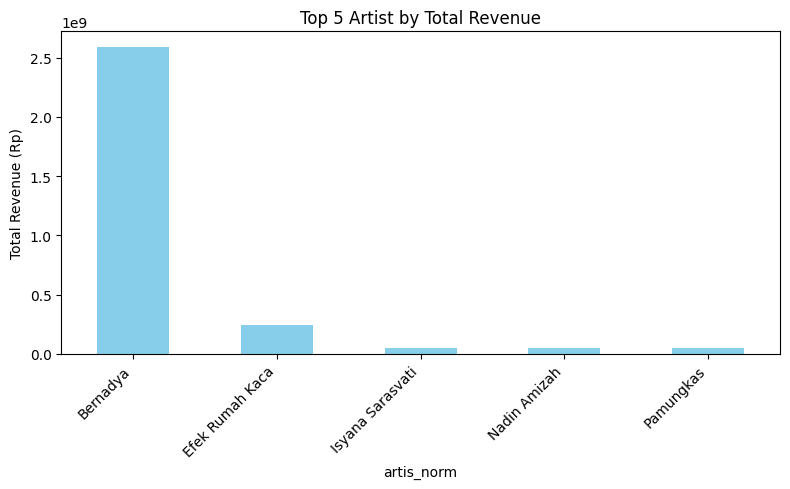

In [ ]:
artist_revenue = df.groupby('artis_norm')['Total_Price'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
artist_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 Artist by Total Revenue')
plt.ylabel('Total Revenue (Rp)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

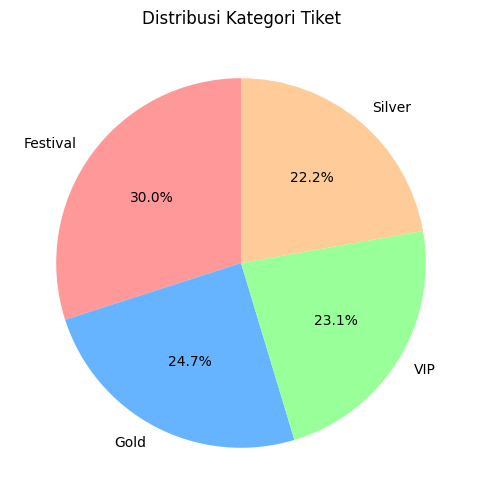

In [ ]:
ticket_dist = df['Ticket_Category'].value_counts()

plt.figure(figsize=(6,6))
ticket_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Kategori Tiket')
plt.ylabel('')
plt.show()


/tmp/ipython-input-3037481699.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_norm.values, y=venue_norm.index, palette="Blues_r")
/tmp/ipython-input-3037481699.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_norm.values, y=artist_norm.index, palette="Greens_r")


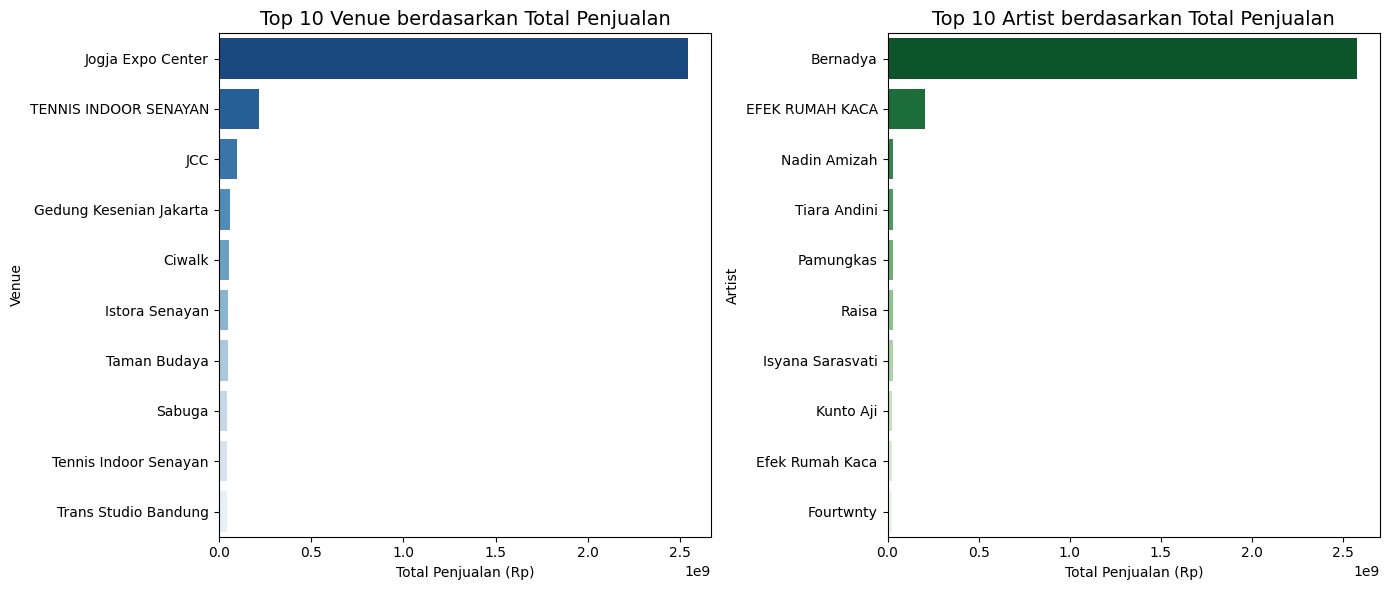

In [ ]:
import seaborn as sns

# --- Grouping ---
venue_norm = df.groupby('Venue')['Total_Price'].sum().sort_values(ascending=False).head(10)
artist_norm = df.groupby('Artist')['Total_Price'].sum().sort_values(ascending=False).head(10)

# --- Plot ---
plt.figure(figsize=(14,6))

# Grafik Venue
plt.subplot(1,2,1)
sns.barplot(x=venue_norm.values, y=venue_norm.index, palette="Blues_r")
plt.title("Top 10 Venue berdasarkan Total Penjualan", fontsize=14)
plt.xlabel("Total Penjualan (Rp)")
plt.ylabel("Venue")

# Grafik Artist
plt.subplot(1,2,2)
sns.barplot(x=artist_norm.values, y=artist_norm.index, palette="Greens_r")
plt.title("Top 10 Artist berdasarkan Total Penjualan", fontsize=14)
plt.xlabel("Total Penjualan (Rp)")
plt.ylabel("Artist")

plt.tight_layout()
plt.show()

In [ ]:
# Groupby venue + artist
grouped = (
    df.groupby(["venue_norm", "artis_norm"], as_index=False)
      .agg({"Total_Price":"sum"})
)

/tmp/ipython-input-1582441750.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_venue = grouped.groupby("venue_norm").apply(


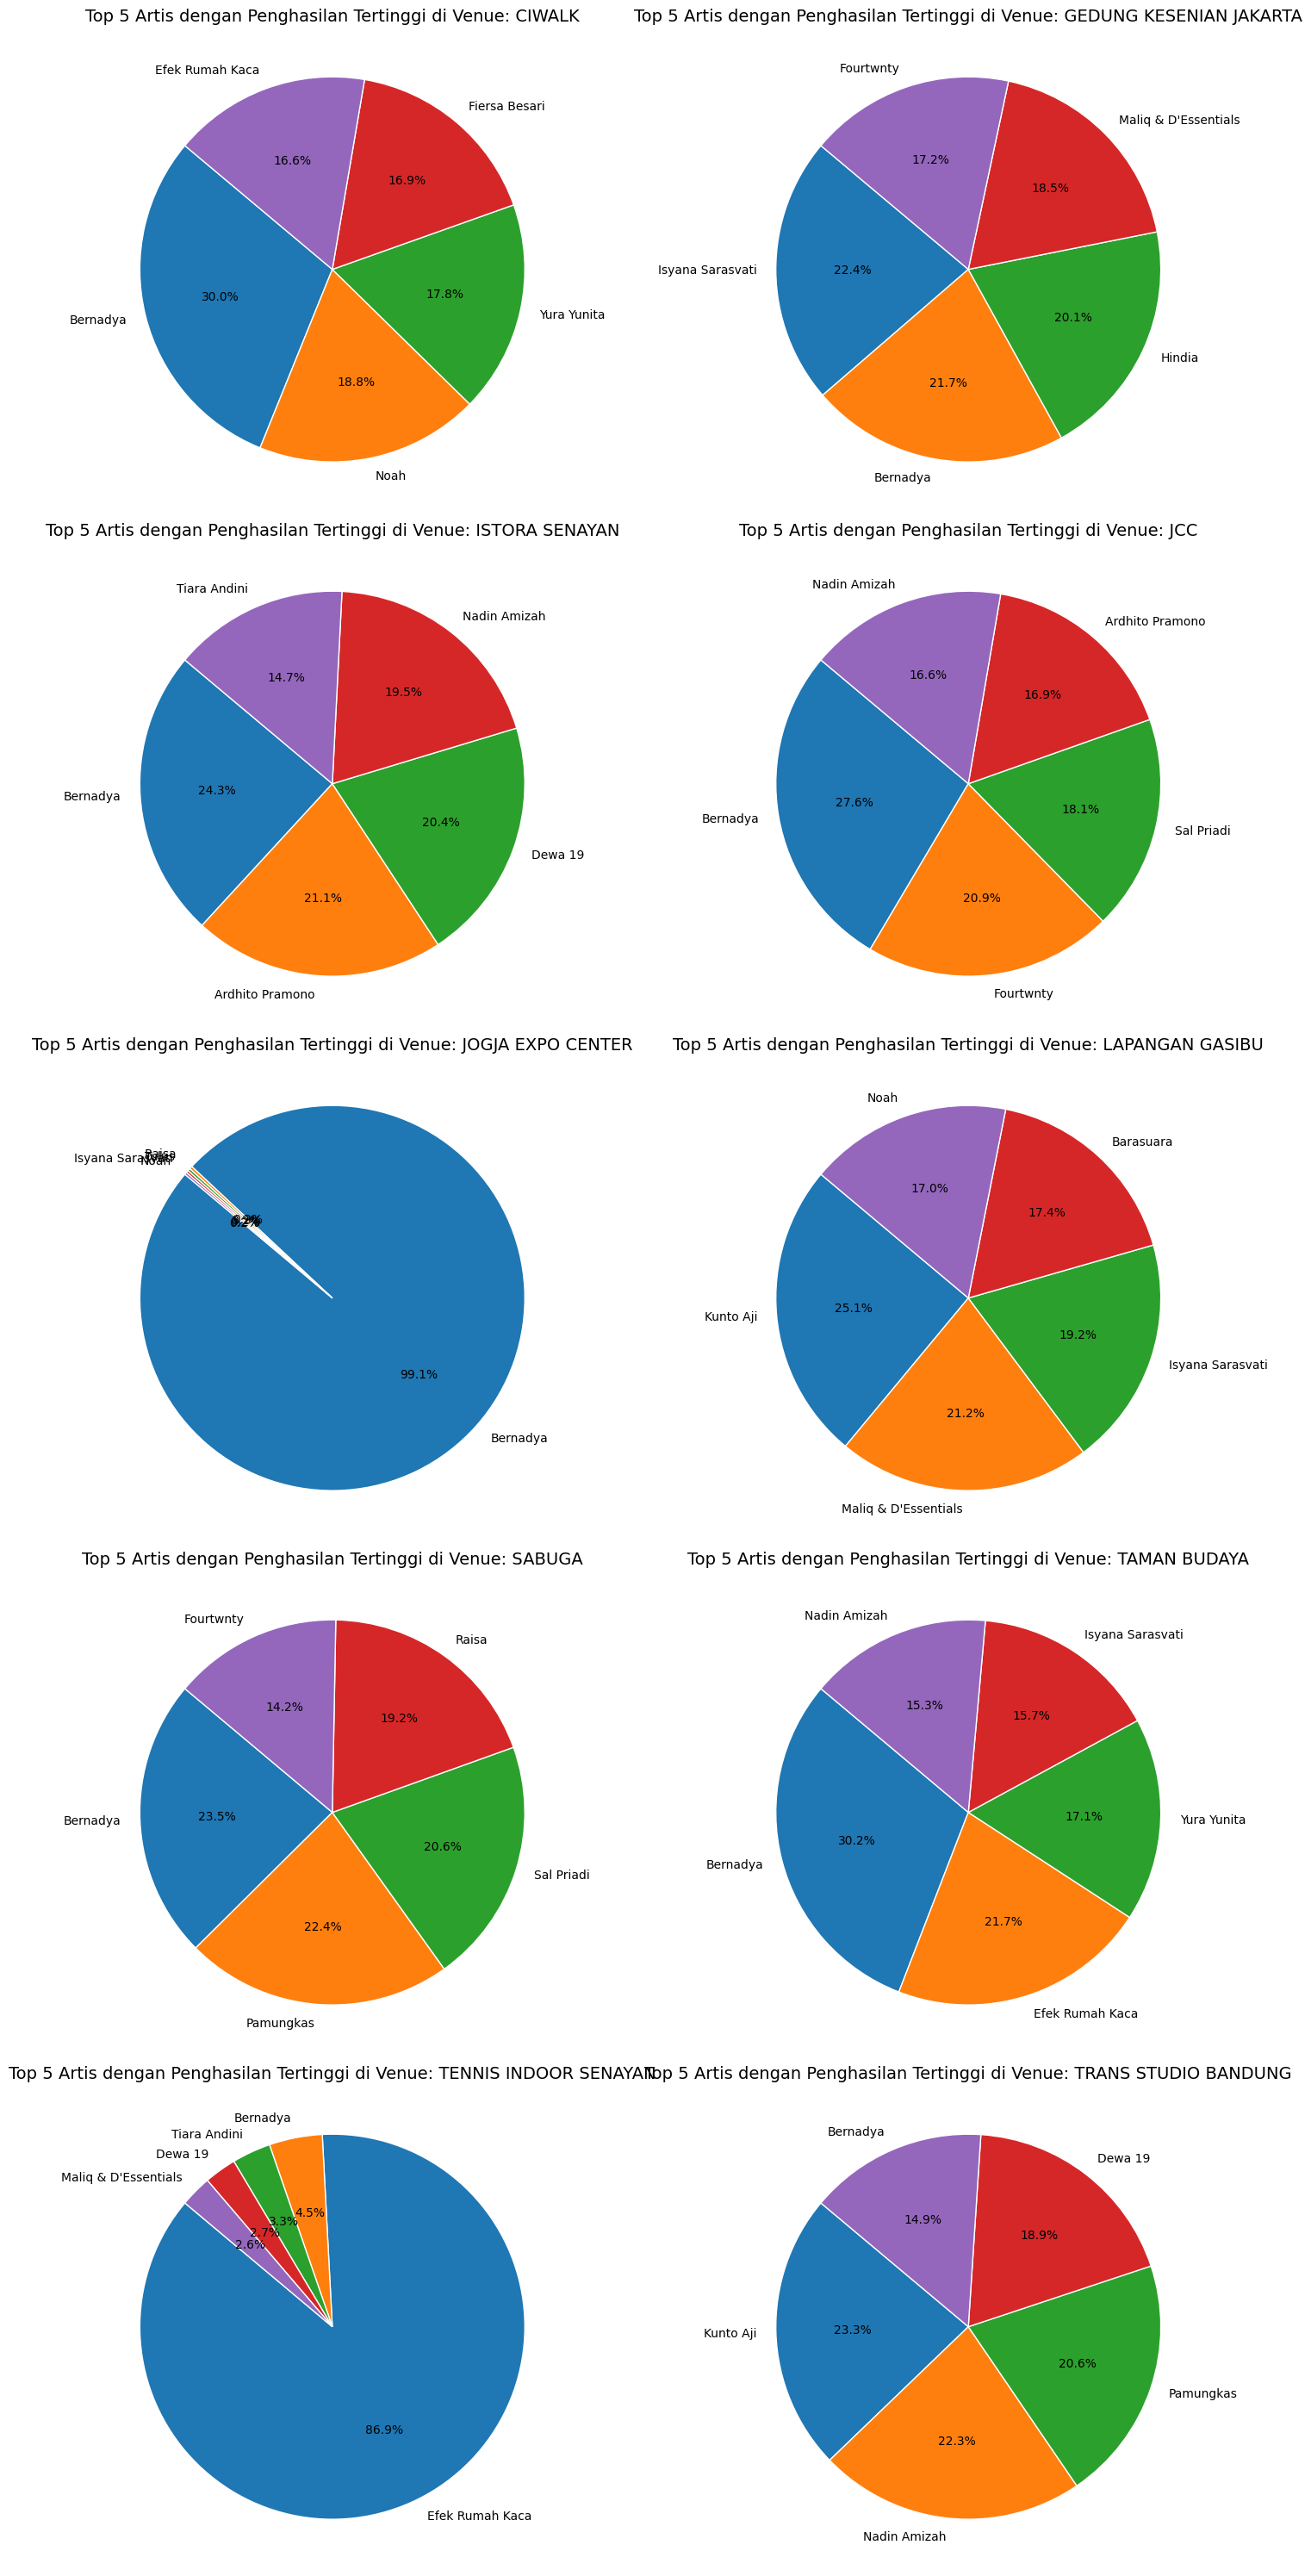

In [122]:
# Ambil top 5 artis per venue
top5_per_venue = grouped.groupby("venue_norm", group_keys=False).apply(
    lambda x: x.sort_values("Total_Price", ascending=False).head(5)
).reset_index(drop=True)

# Plot pie chart per venue
venues = top5_per_venue["venue_norm"].unique()
n_venues = len(venues)

# Calculate the number of rows needed for 2 columns
n_cols = 2
n_rows = (n_venues + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows*6)) # Adjust figure size based on number of rows

for i, venue in enumerate(venues, 1):
    data = top5_per_venue[top5_per_venue["venue_norm"] == venue]
    # Use n_rows, n_cols, and the current index to position the subplot
    plt.subplot(n_rows, n_cols, i)
    plt.pie(
        data["Total_Price"],
        labels=data["artis_norm"],
        autopct="%1.1f%%",
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f"Top 5 Artis dengan Penghasilan Tertinggi di Venue: {venue}", fontsize=14)

plt.tight_layout()
plt.show()